In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pylab as plt
from firecrown.likelihood.likelihood import load_likelihood
from firecrown.likelihood.likelihood import load_likelihood_from_module_type
from firecrown.parameters import ParamsMap
import numpy as np
import sacc
import pathlib
import pyccl as ccl
from firecrown.modeling_tools import ModelingTools
import firecrown
import sys
import os
import inspect
from copy import deepcopy
# we need to import a firecrown example likelihood:
# exports the path to the environment variable FIRECROWN_DIR
os.environ["FIRECROWN_DIR"] = os.path.dirname('/Users/loureiro/Work/Github/firecrown/')

In [2]:
# importing the example likelihood module from the firecrown examples
sys.path.append(os.path.join(os.environ["FIRECROWN_DIR"], "examples", "des_y1_3x2pt"))
# trying to import the example likelihood
import des_y1_3x2pt_PT 

In [3]:
sys.path.append('../src/smokescreen/')
from smokescreen import ConcealDataVector

In [4]:
# ccl cosmology
cosmo = ccl.Cosmology(Omega_c=0.27, 
                      Omega_b=0.045, 
                      h=0.67, 
                      sigma8=0.8, 
                      n_s=0.96, 
                      transfer_function='bbks')
sacc_data = sacc.Sacc.load_fits('/Users/loureiro/Work/Github/firecrown/examples/des_y1_3x2pt/des_y1_3x2pt_sacc_data.fits')

# FIXME: not sure there's another way of setting this from the likelihood
syst_dict = {
            "ia_a_1": 1.0,
            "ia_a_2": 0.5,
            "ia_a_d": 0.5,
            "lens0_bias": 2.0,
            "lens0_b_2": 1.0,
            "lens0_b_s": 1.0,
            "lens0_mag_bias": 1.0,
            "src0_delta_z": 0.000,
            "lens0_delta_z": 0.000,}

## Deterministic Shift

In [5]:
smkscr = ConcealDataVector(cosmo, syst_dict, des_y1_3x2pt_PT, {'Omega_c': 0.35, 'sigma8': 0.9},sacc_data, **{'debug': True})

Using parameters: ['ia_a_d', 'lens0_mag_bias', 'lens0_bias', 'ia_a_1', 'src0_delta_z', 'lens0_delta_z', 'lens0_b_s', 'lens0_b_2', 'ia_a_2']
Using parameters: ['ia_a_d', 'lens0_mag_bias', 'lens0_bias', 'ia_a_1', 'src0_delta_z', 'lens0_delta_z', 'lens0_b_s', 'lens0_b_2', 'ia_a_2']
[DEBUG] Shifts: {'Omega_c': 0.35, 'sigma8': 0.9}
[DEBUG] Blinded Cosmology: <pyccl.cosmology.Cosmology>
	Neff    = 3.044
	Omega_b = 0.045
	Omega_c = 0.35
	h       = 0.67
	n_s     = 0.96
	sigma8  = 0.9
	extra_parameters =
	HASH_ACCURACY_PARAMS = 0xe21501bbb461cd55


/opt/homebrew/Caskroom/miniforge/base/envs/desc_blinding/lib/python3.11/site-packages/sacc/sacc.py:974: UserWarning: No bandpower windows associated to these data
  warnings.warn("No bandpower windows associated to these data")


In [6]:
smkscr.calculate_blinding_factor()
blinded_dv = smkscr.apply_blinding_to_likelihood_datavec()

/opt/homebrew/Caskroom/miniforge/base/envs/desc_blinding/lib/python3.11/site-packages/pyccl/nl_pt/ept.py:375: CCLWarning: EulerianPTCalculators assume linear galaxy bias when computing galaxy-IA cross-correlations.
  warnings.warn(


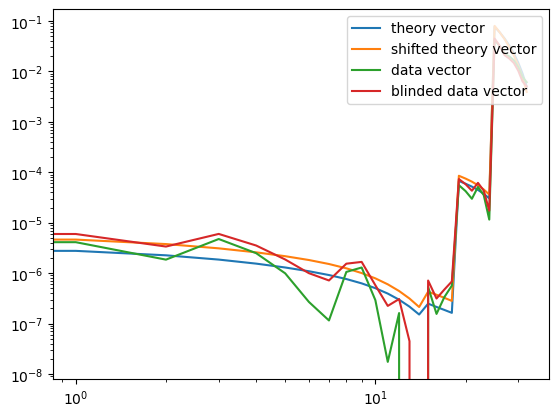

In [7]:
plt.figure()
plt.loglog(smkscr.theory_vec_fid, label='theory vector')
plt.loglog(smkscr.theory_vec_blind, label='shifted theory vector')
plt.loglog(smkscr.likelihood.get_data_vector(), label='data vector')
plt.loglog(blinded_dv, label='blinded data vector')
plt.legend(loc=1)
plt.show()

### Random shift withing a range $(\theta_{\rm min}, \theta_{\rm max})$

In [8]:
smkscr = ConcealDataVector(cosmo, syst_dict, des_y1_3x2pt_PT,
                           {'Omega_c': (0.22, 0.32), 'sigma8': (0.7, 0.9)},
                           sacc_data, **{'debug': True})

Using parameters: ['ia_a_d', 'lens0_mag_bias', 'lens0_bias', 'ia_a_1', 'src0_delta_z', 'lens0_delta_z', 'lens0_b_s', 'lens0_b_2', 'ia_a_2']
Using parameters: ['ia_a_d', 'lens0_mag_bias', 'lens0_bias', 'ia_a_1', 'src0_delta_z', 'lens0_delta_z', 'lens0_b_s', 'lens0_b_2', 'ia_a_2']
[DEBUG] Shifts: {'Omega_c': 0.2479478911323865, 'sigma8': 0.7523342795879359}
[DEBUG] Blinded Cosmology: <pyccl.cosmology.Cosmology>
	Neff    = 3.044
	Omega_b = 0.045
	Omega_c = 0.2479478911323865
	h       = 0.67
	n_s     = 0.96
	sigma8  = 0.7523342795879359
	extra_parameters =
	HASH_ACCURACY_PARAMS = 0xe21501bbb461cd55


In [9]:
smkscr.calculate_blinding_factor()
blinded_dv = smkscr.apply_blinding_to_likelihood_datavec()

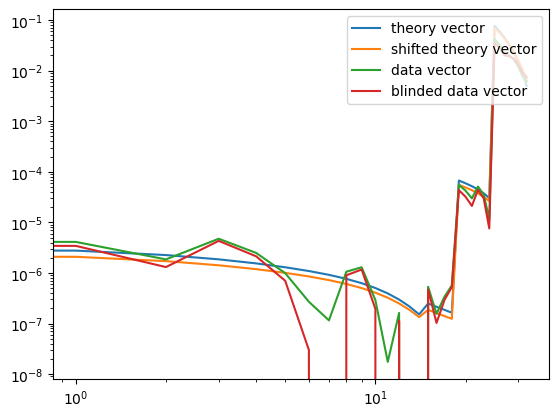

In [10]:
plt.figure()
plt.loglog(smkscr.theory_vec_fid, label='theory vector')
plt.loglog(smkscr.theory_vec_blind, label='shifted theory vector')
plt.loglog(smkscr.likelihood.get_data_vector(), label='data vector')
plt.loglog(blinded_dv, label='blinded data vector')
plt.legend(loc=1)
plt.show()

### Random shift around the fiducial value $(-\Delta\theta_{\rm min}, \Delta\theta_{\rm max})$

In [11]:
smkscr = ConcealDataVector(cosmo, syst_dict, des_y1_3x2pt_PT,
                          {'Omega_c': (-0.1, 0.1), 'sigma8': (-0.1, 0.1)},
                          sacc_data, **{'debug': True})

Using parameters: ['ia_a_d', 'lens0_mag_bias', 'lens0_bias', 'ia_a_1', 'src0_delta_z', 'lens0_delta_z', 'lens0_b_s', 'lens0_b_2', 'ia_a_2']
Using parameters: ['ia_a_d', 'lens0_mag_bias', 'lens0_bias', 'ia_a_1', 'src0_delta_z', 'lens0_delta_z', 'lens0_b_s', 'lens0_b_2', 'ia_a_2']
[DEBUG] Shifts: {'Omega_c': 0.22589578226477303, 'sigma8': 0.7523342795879359}
[DEBUG] Blinded Cosmology: <pyccl.cosmology.Cosmology>
	Neff    = 3.044
	Omega_b = 0.045
	Omega_c = 0.22589578226477303
	h       = 0.67
	n_s     = 0.96
	sigma8  = 0.7523342795879359
	extra_parameters =
	HASH_ACCURACY_PARAMS = 0xe21501bbb461cd55


In [12]:
smkscr.calculate_blinding_factor()
blinded_dv = smkscr.apply_blinding_to_likelihood_datavec()

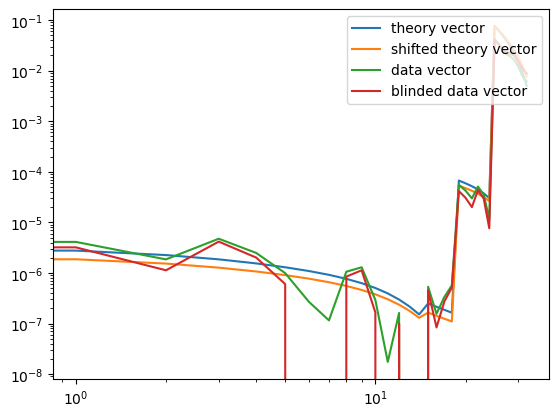

In [13]:
plt.figure()
plt.loglog(smkscr.theory_vec_fid, label='theory vector')
plt.loglog(smkscr.theory_vec_blind, label='shifted theory vector')
plt.loglog(smkscr.likelihood.get_data_vector(), label='data vector')
plt.loglog(blinded_dv, label='blinded data vector')
plt.legend(loc=1)
plt.show()